In [1]:
!nvidia-smi

Fri Sep 27 16:26:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics
!pip install albumentations

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.25M/6.25M [00:00<00:00, 168MB/s]
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 13.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 105.7ms
Speed: 11.8ms preprocess, 105.7ms inference, 858.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


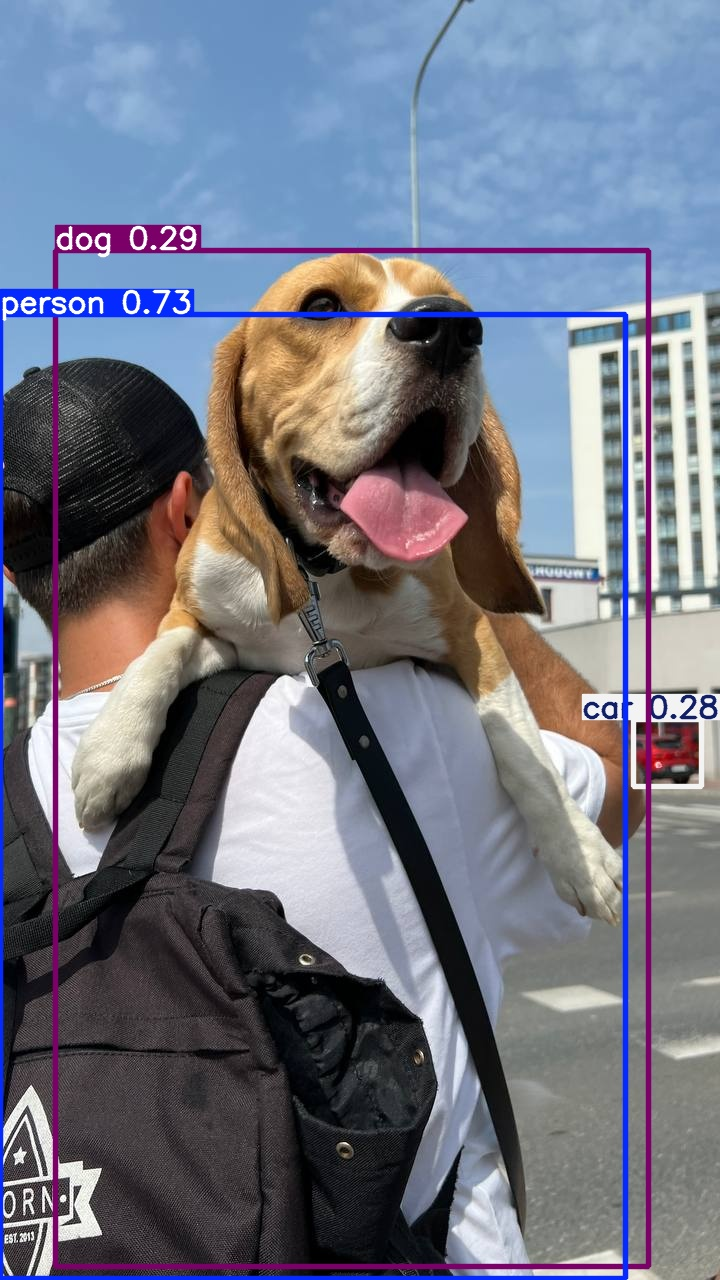

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 58.7ms
Speed: 4.0ms preprocess, 58.7ms inference, 687.2ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Download_Links/YOLOV8

/content/drive/MyDrive/Download_Links/YOLOV8


In [5]:
import shutil

# Assuming the zip file is in the current working directory
shutil.unpack_archive('isd_data.zip', 'isd_data', format='zip')

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data= data.yaml epochs=100 imgsz=640 plots=True workers=4

100% 131M/131M [00:00<00:00, 388MB/s]
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!ls runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch720.jpg
confusion_matrix.png				    R_curve.png       train_batch721.jpg
events.out.tfevents.1727448824.cd0e25d3298b.2672.0  results.csv       train_batch722.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


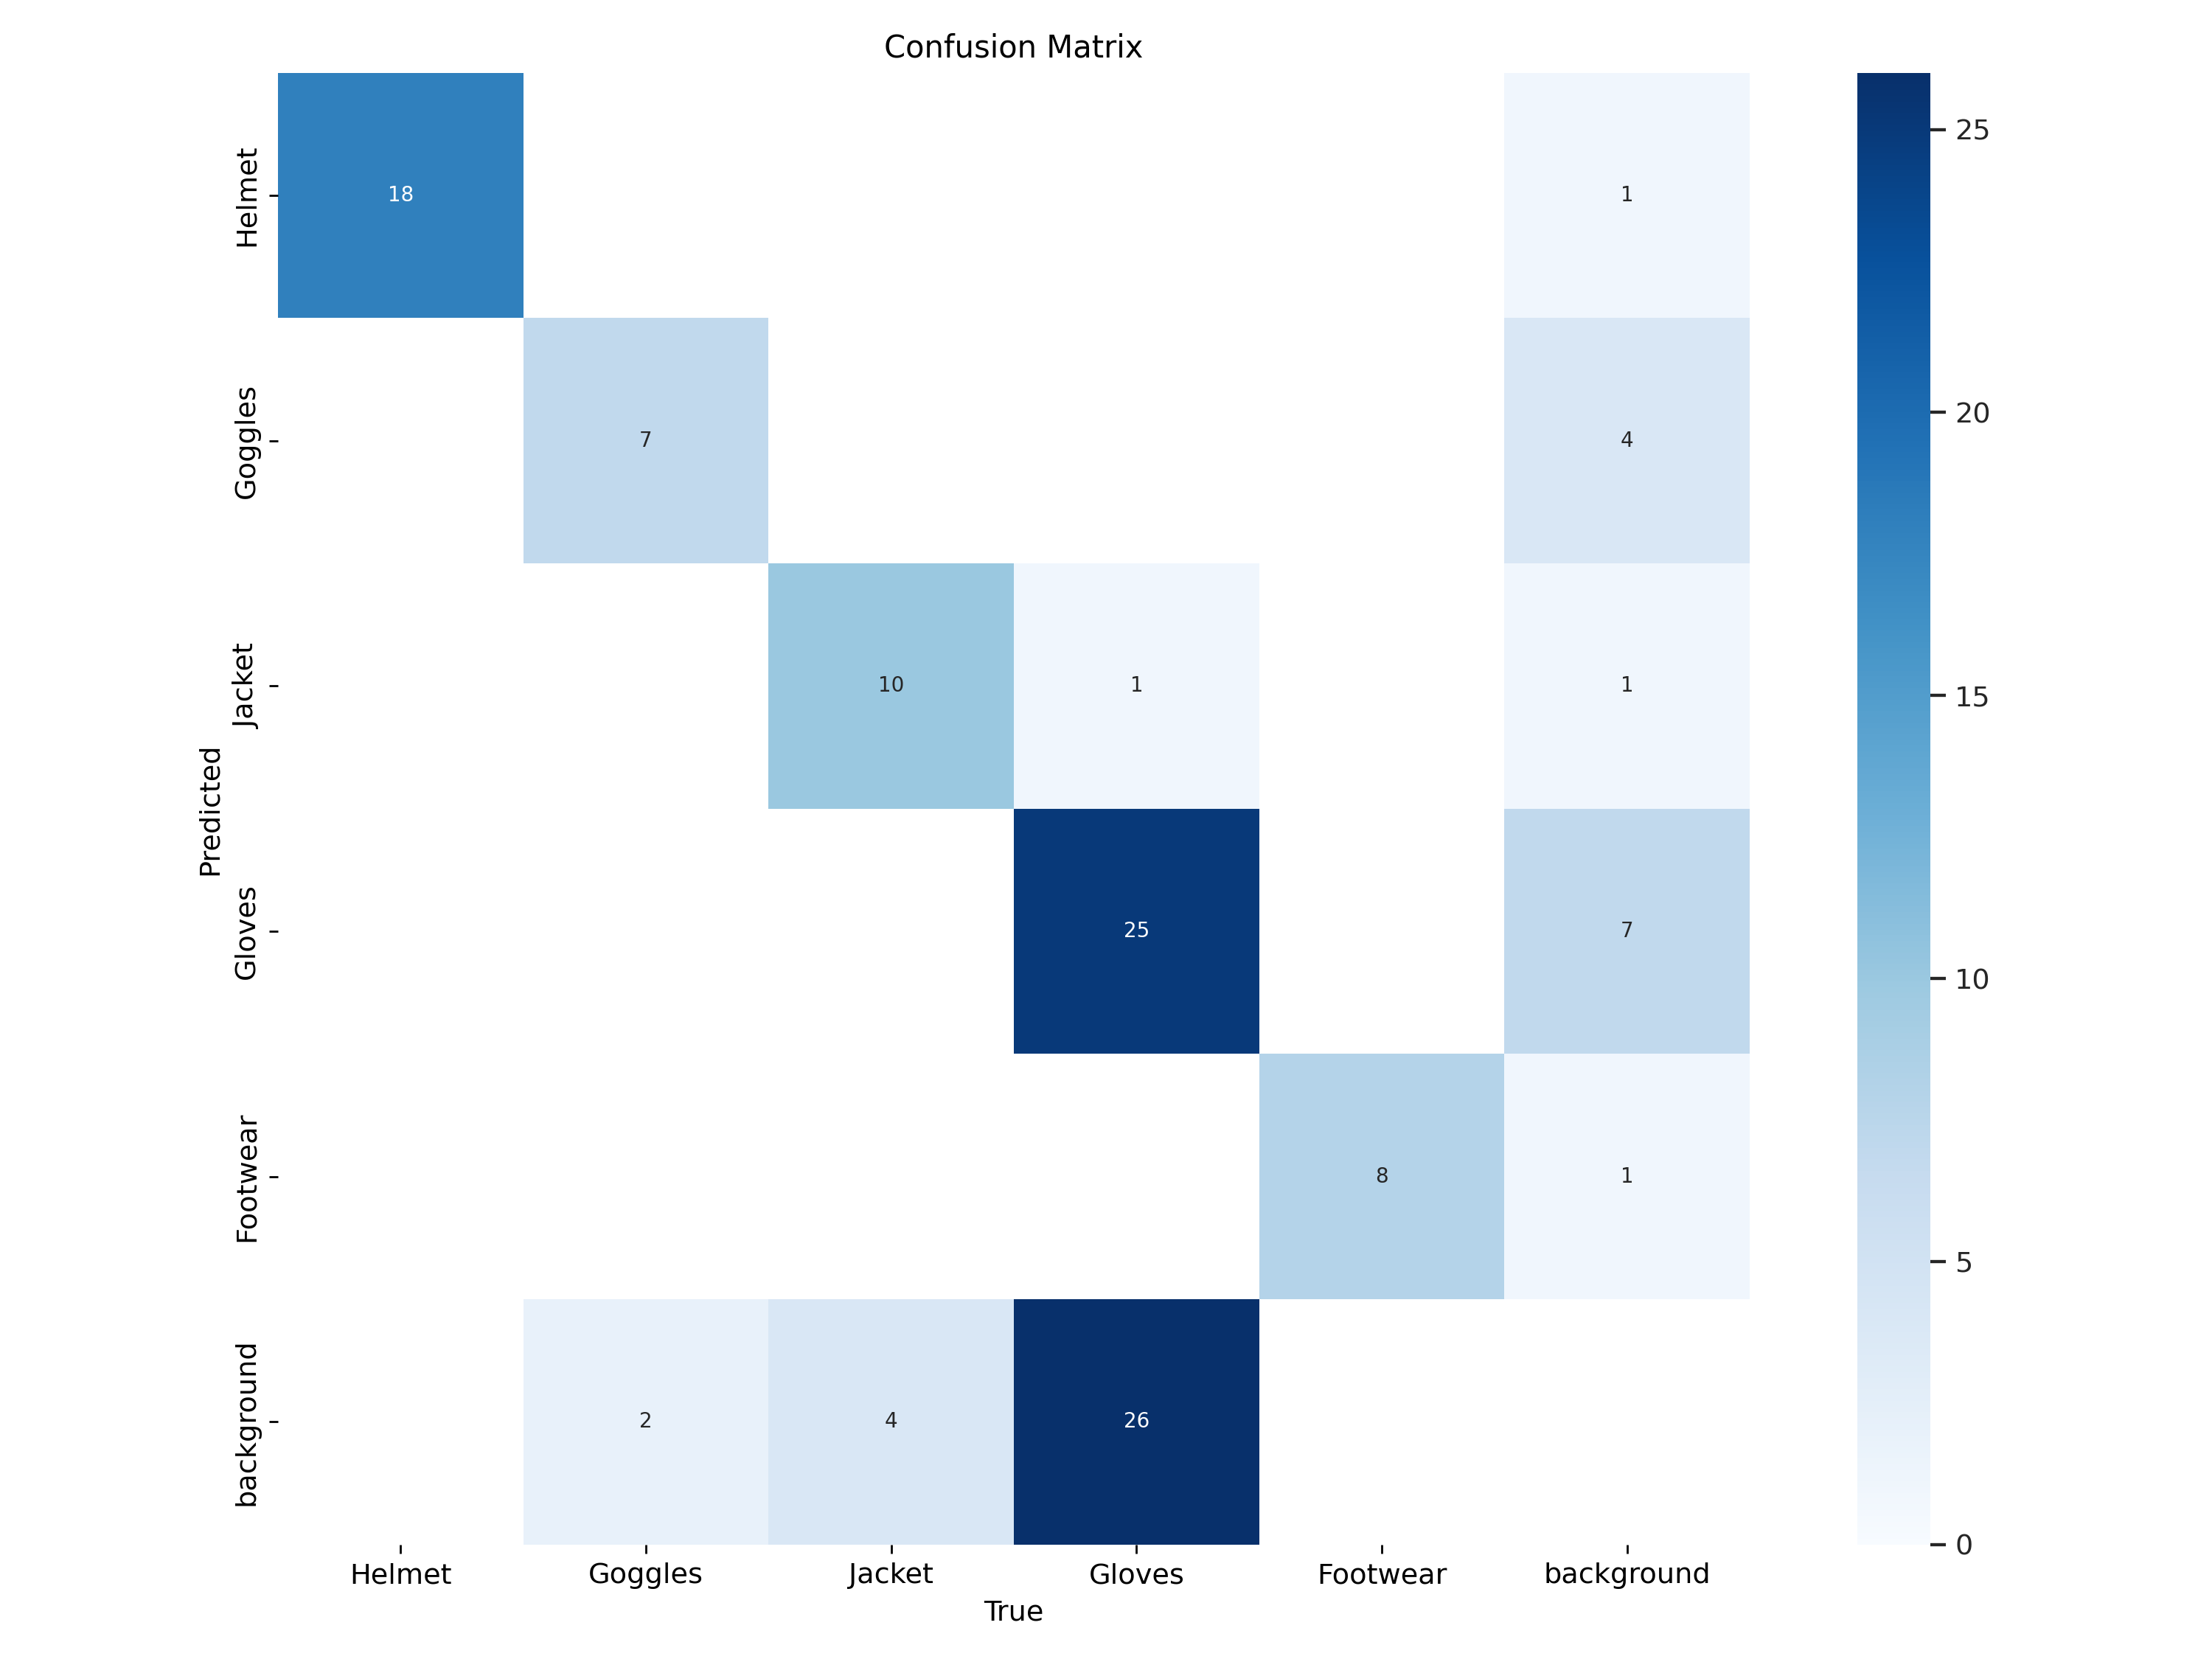

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

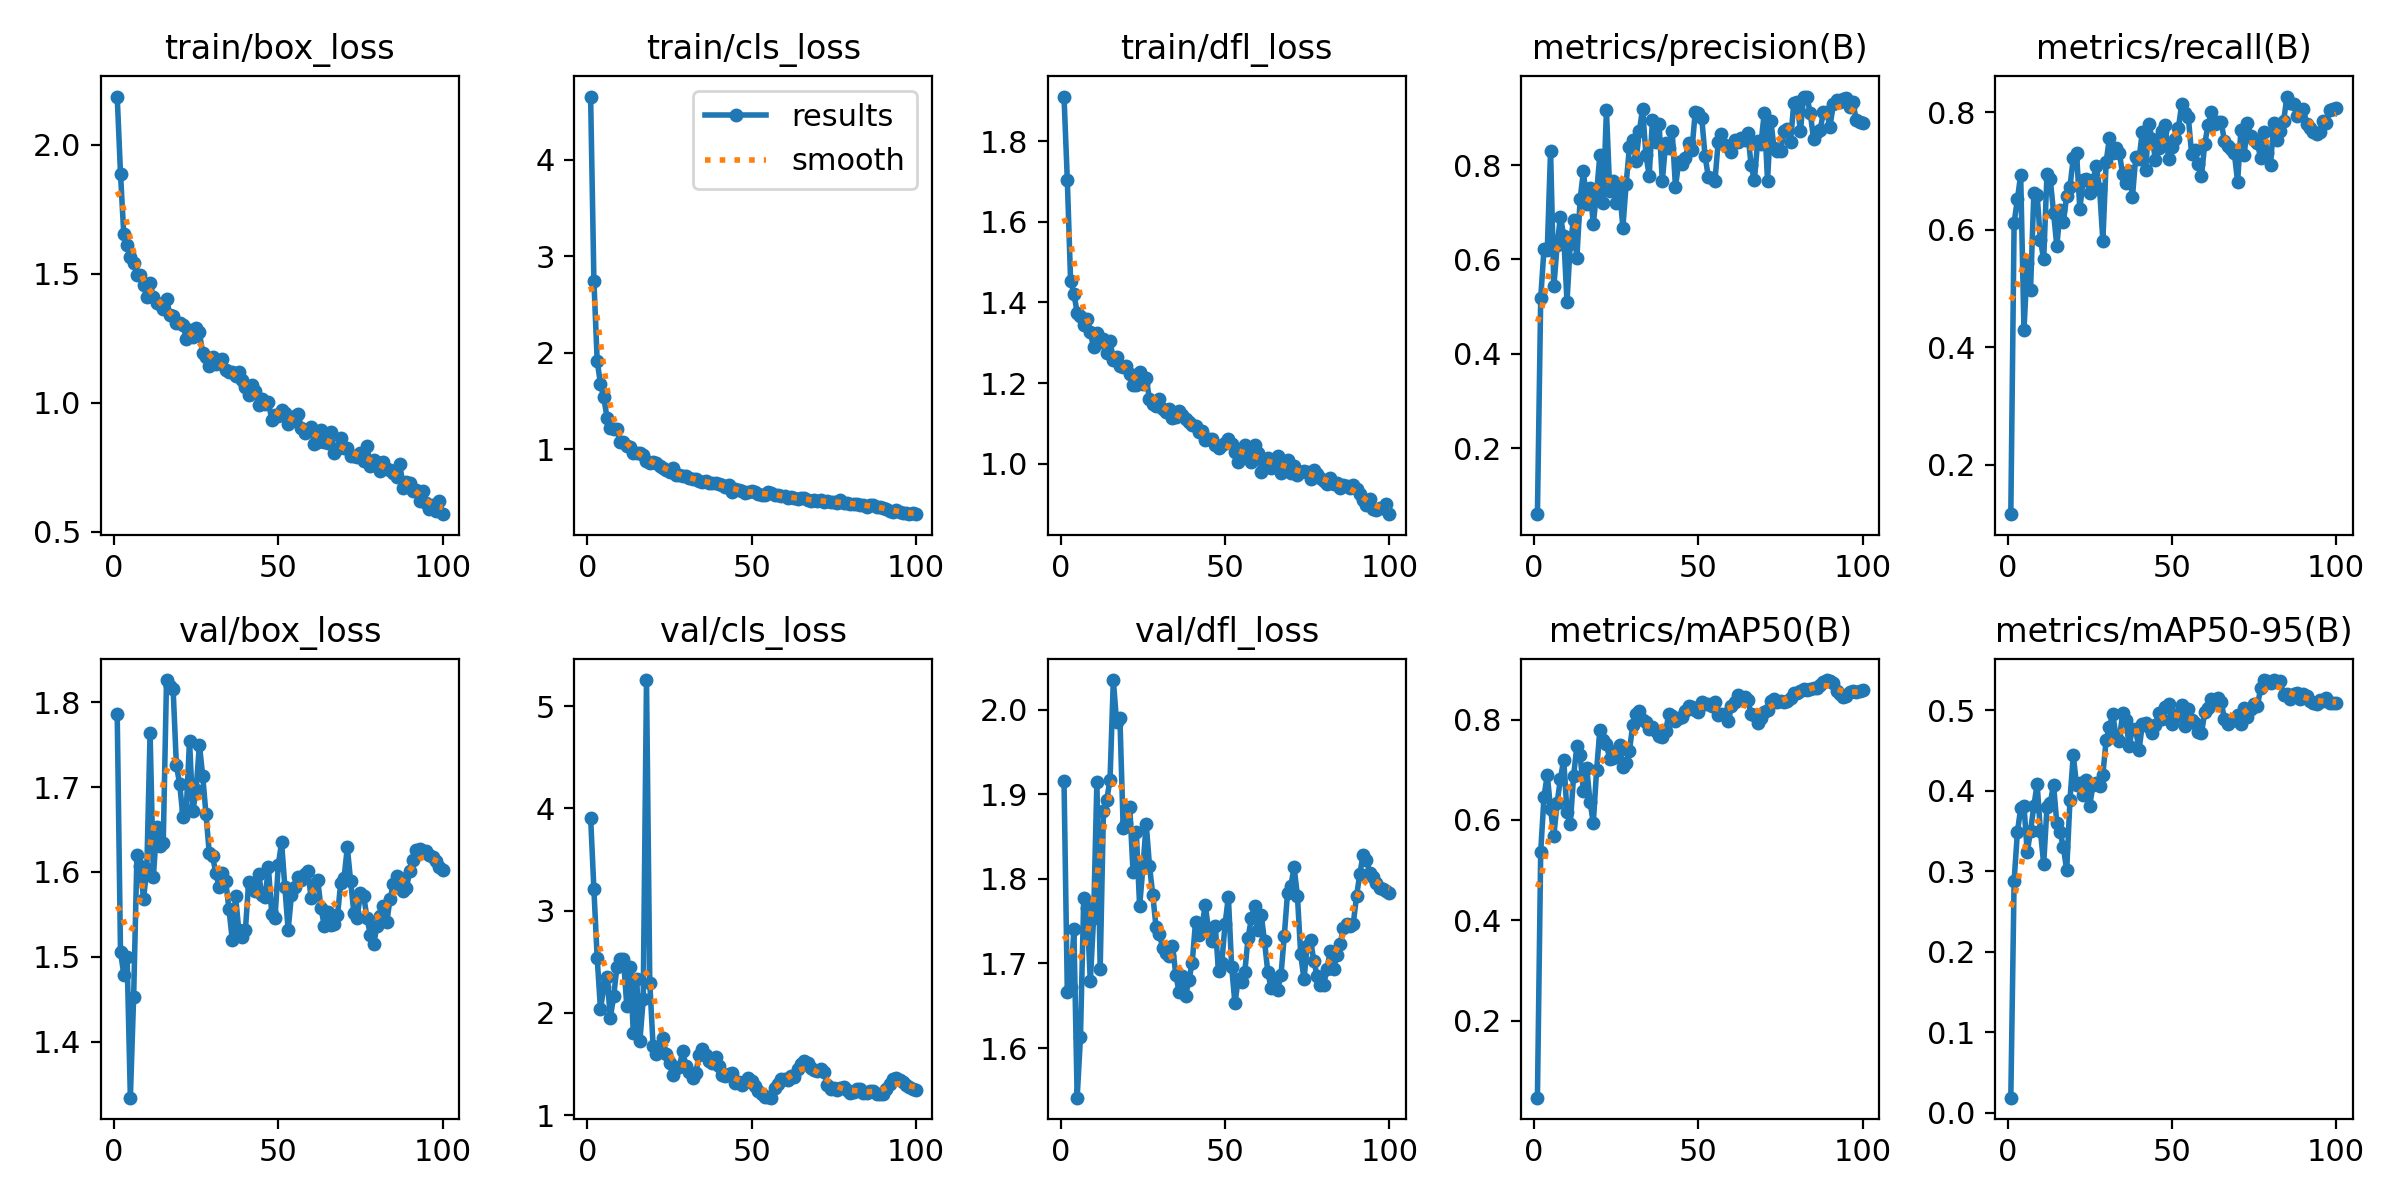

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

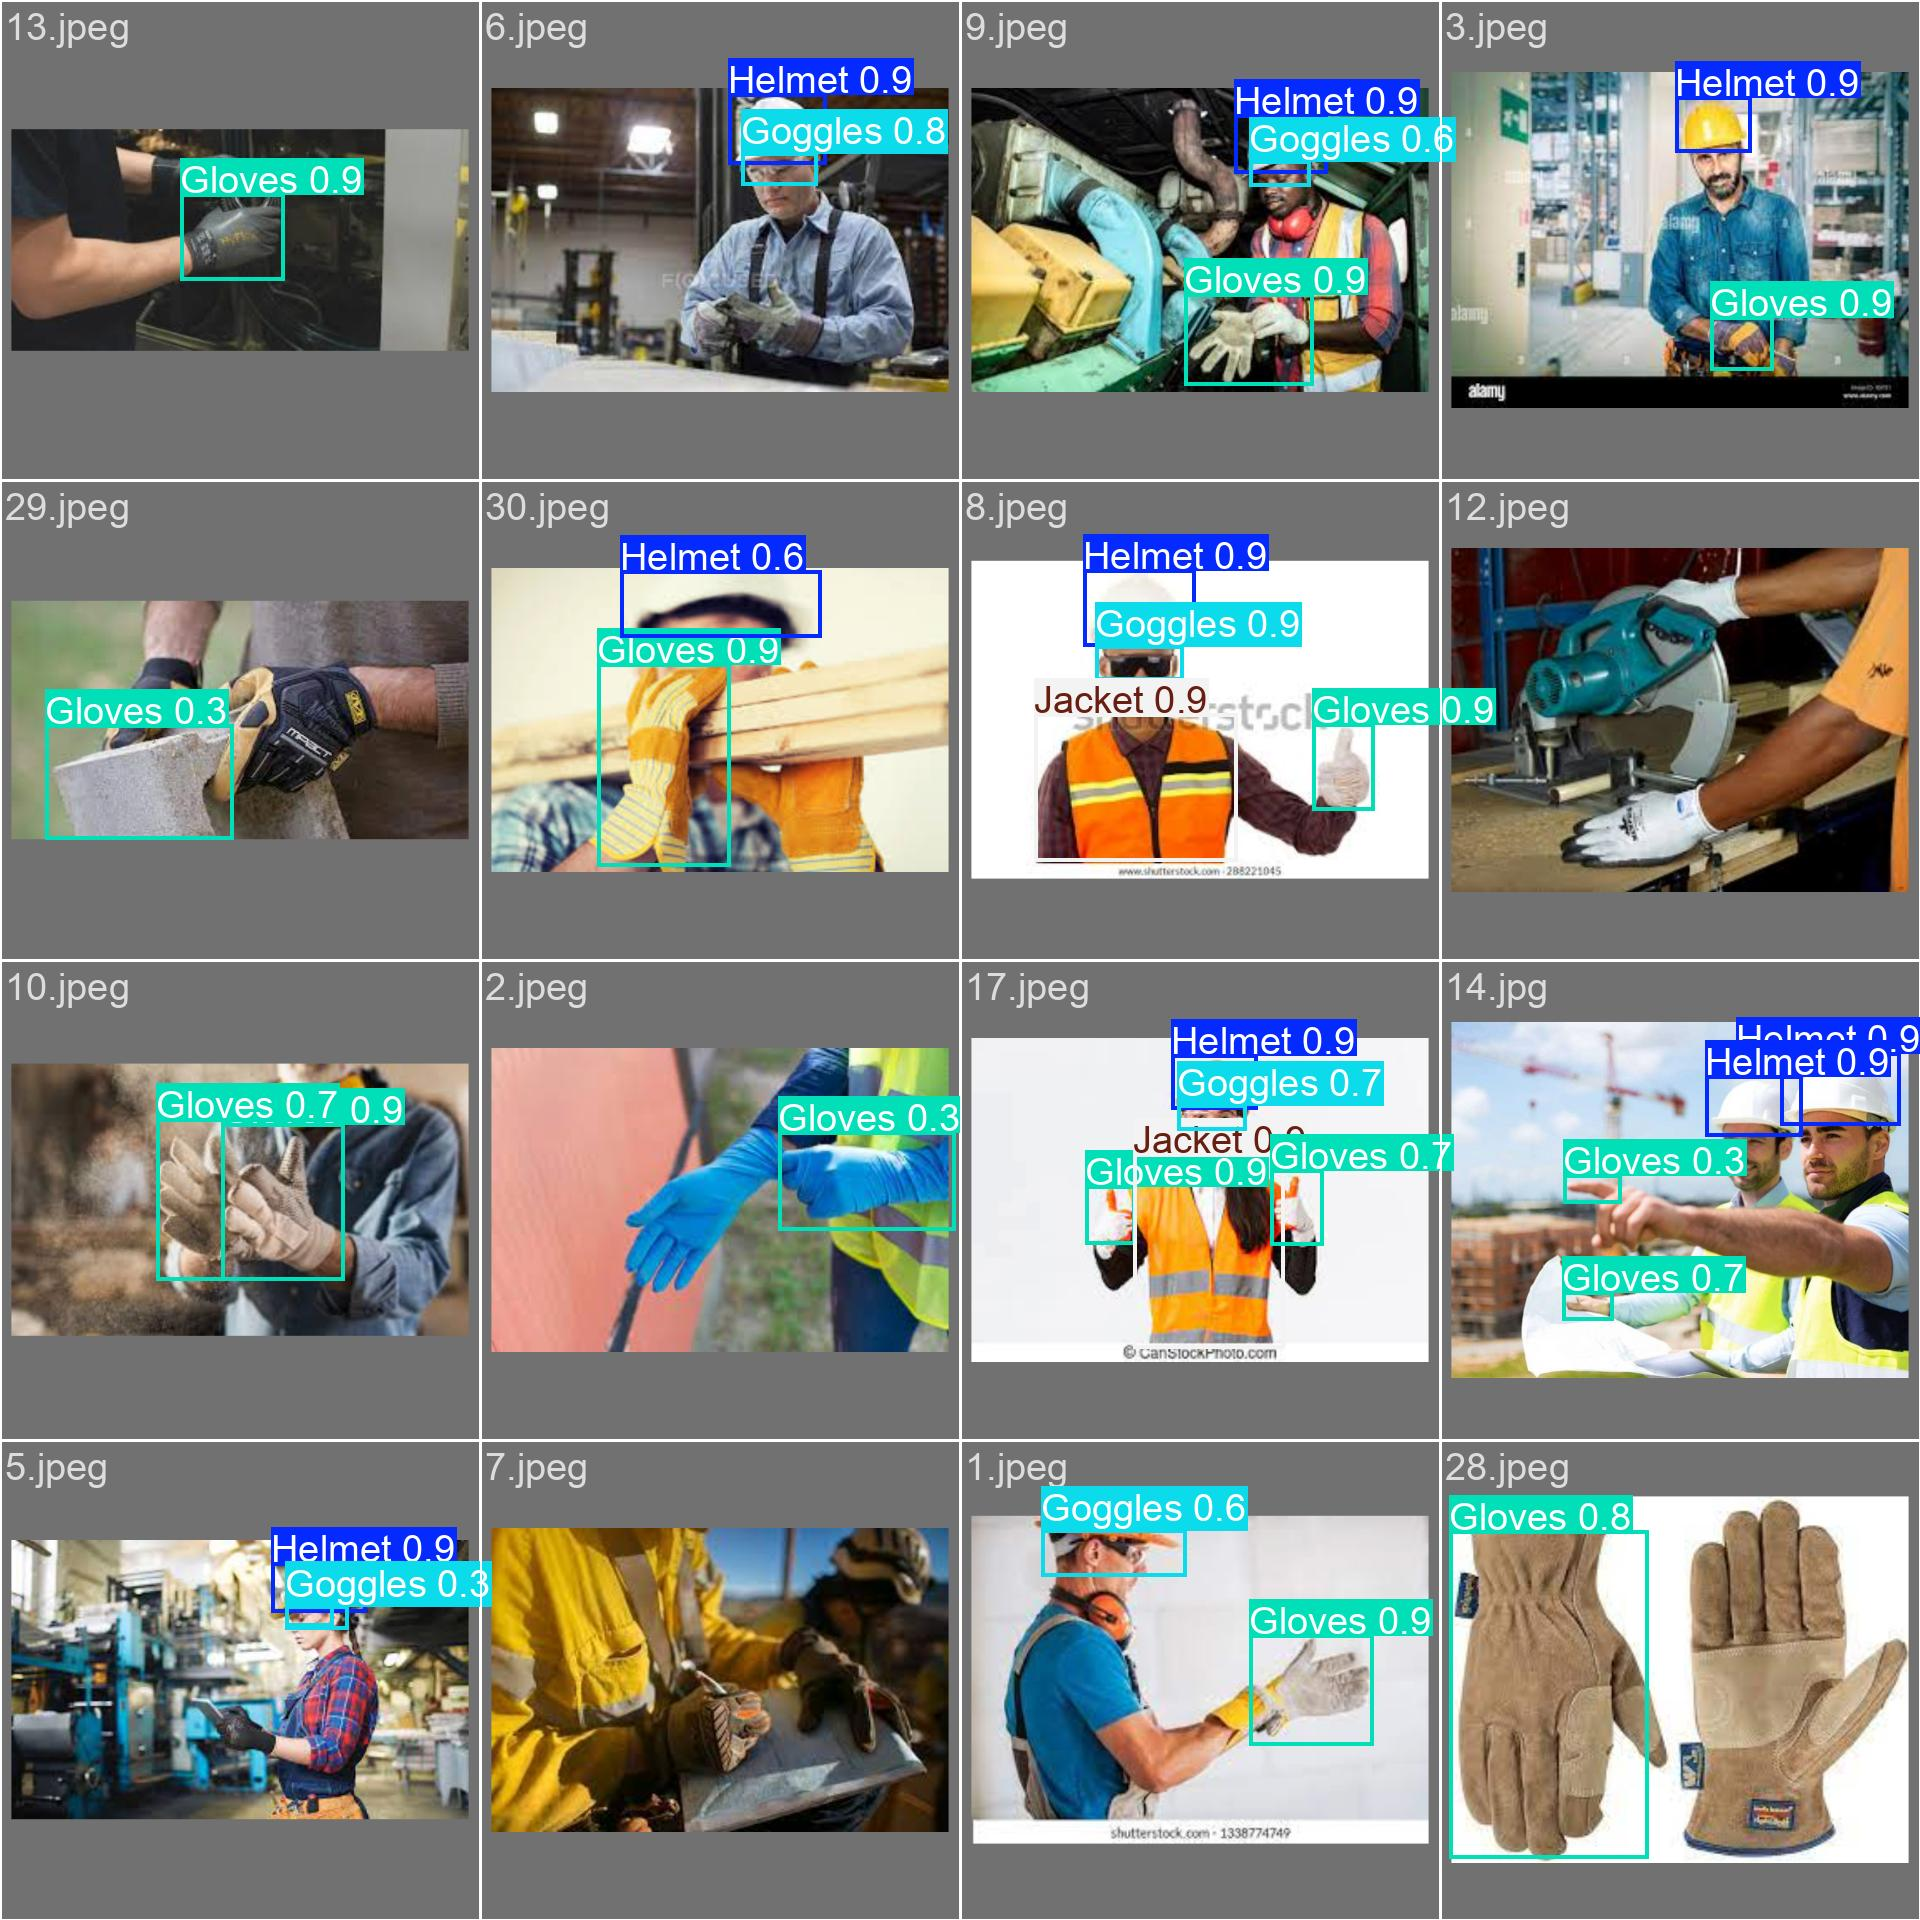

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Download_Links/YOLOV8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.35it/s]
                   all         31        101      0.874      0.765      0.859      0.541
                Helmet         17         18      0.936          1      0.995      0.708
               Goggles          9          9      0.759      0.703      0.812      0.439
                Jacket         13         14      0.914      0.714      0.839      0.592
                Gloves         30         52      0.842       0.41      0.652       0.34
              Footwear          4          8      0.919          1      0.995      0.624
Speed: 0.2ms preproc

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/1.jpeg: 480x640 1 Helmet, 1 Goggles, 1 Gloves, 38.4ms
image 2/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/10.jpeg: 384x640 2 Glovess, 38.9ms
image 3/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/11.jpeg: 640x640 1 Gloves, 17.1ms
image 4/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/12.jpeg: 512x640 1 Jacket, 39.5ms
image 5/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/13.jpeg: 320x640 1 Gloves, 41.7ms
image 6/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/14(1).jpeg: 640x608 1 Jacket, 40.5ms
image 7/31 /content/drive/MyDrive/Download_Links/YOLOV8/data/test/images/14.jpg: 512x640 2 Helmets, 1 Gloves, 14.1ms
image 8/31 /content/drive/MyDrive/Download_Li

**NOTE:** Let's take a look at few results.

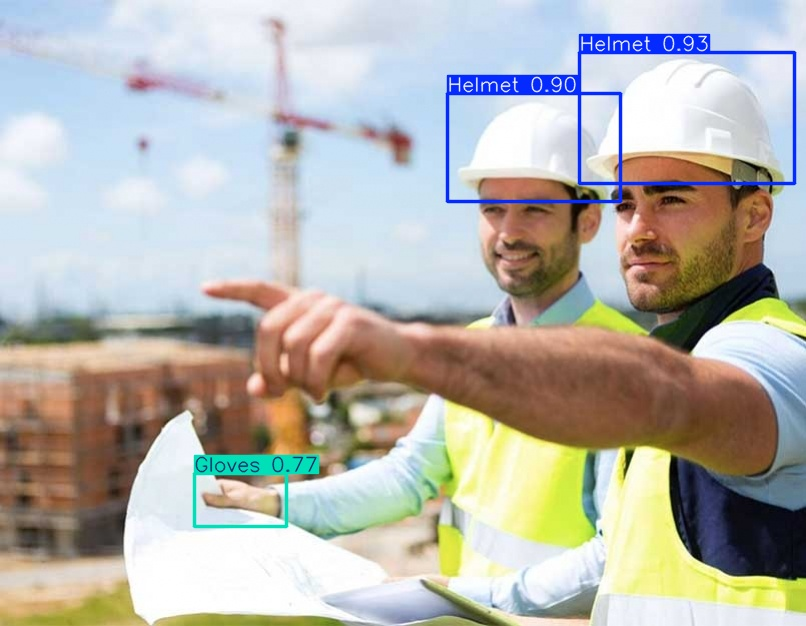

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")